In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
df_e = pd.read_excel("excel_data/china_electronics_financial_data.xlsx")
df_e['year'] = df_e['year'].astype(str)
df_e_yr = df_e[df_e['year'].str.contains(r'-12-', na=False)].copy()
df_e_yr['year'] = df_e_yr['year'].str.slice(start=0, stop=4)
df_e_yr['year'] = pd.to_numeric(df_e_yr['year'])
df_bank = pd.read_csv("data/reshaped_data.csv")

df_e_yr = df_e_yr[df_e_yr['year'] >= 1999]
df_bank = df_bank[df_bank['year'] >= 1999]

df_joined = pd.merge(df_e_yr, df_bank, on='year', how='inner')

In [44]:
# Ensure the column is of numeric type
df_joined['CN: EI: No of Employee'] = pd.to_numeric(df_joined['CN: EI: No of Employee'], errors='coerce')

df_joined['CN: EI: No of Employee'] = df_joined['CN: EI: No of Employee']  * 1000
# Apply linear interpolation
df_joined['CN: EI: No of Employee'] = df_joined['CN: EI: No of Employee'].interpolate(method='linear', limit_direction='forward')

# values from [2013, 2014, 2015] for num employees are interpolated

df_joined["people working in electronics (%)"] = ((df_joined["CN: EI: No of Employee"]) / df_joined["Population, total"]) * 100

df_joined[["year", "people working in electronics (%)", "CN: EI: No of Employee", "Population, total"]]

# df_joined[["year", "people working in electronics (%)"]]

,year,people working in electronics (%),CN: EI: No of Employee,"Population, total"
0,1999,0.127204,1593534.00,1.252735e+09
1,2000,0.126053,1591598.00,1.262645e+09
2,2001,0.140903,1792073.00,1.271850e+09
3,2002,0.252138,3228375.00,1.280400e+09
4,2003,0.275910,3554830.00,1.288400e+09
5,2004,0.339444,4399452.00,1.296075e+09
6,2005,0.422290,5505477.00,1.303720e+09
7,2006,0.477795,6263994.00,1.311020e+09
8,2007,0.512046,6748183.00,1.317885e+09
9,2008,0.573371,7595185.00,1.324655e+09


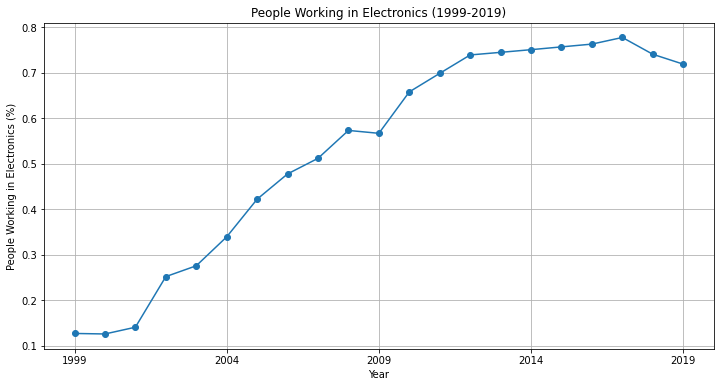

In [42]:
import matplotlib.pyplot as plt


# Filter the DataFrame for years from 1999 to 2019
df_plot_filtered = df_joined[df_joined['year'] <= 2019]

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df_plot_filtered['year'], df_plot_filtered['people working in electronics (%)'], marker='o')
plt.title('People Working in Electronics (1999-2019)')
plt.xlabel('Year')
plt.ylabel('People Working in Electronics (%)')
plt.xticks(range(1999, 2020, 5))
plt.grid(True)
plt.show()
